<a href="https://colab.research.google.com/github/jtj7387/AI_2020_spring/blob/master/05_SVM_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tpts = np.array([[1, 2], [1, 5], [2, 2],[7, 5], [9, 4], [8, 2]]) # 앞에 3개는  labels 1에 속하고 뒤에 3개는 0에 속한다.
labels = [1, 1, 1, 1, 0, 0] # 각각의 쌍을 쉽게 두 가지 데이터로 표현


In [3]:
tpts

array([[1, 2],
       [1, 5],
       [2, 2],
       [7, 5],
       [9, 4],
       [8, 2]])

In [4]:
tpts.shape # 6개의 데이터와 2차원으로 되어있구나

(6, 2)

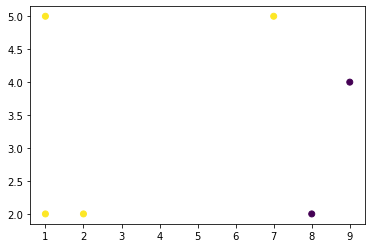

In [5]:
plt.scatter(tpts[:, 0], tpts[:, 1], c=labels )  


In [6]:
clf = SVC(kernel='linear') # SVC에 사용되는 구분선을 선으로 표현? clf=classifier

In [7]:
#%%time
clf.fit(tpts, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

테스트 해보기

In [8]:
pred1 = clf.predict([[3, 3]]) # (3.3)이 어디에 어떤 영역에 해당되는지 아는 방법
print(pred1[0])

1


In [9]:
pred1 = clf.predict([[7, 4]]) # (7,4)가 어디에 어떤 영역에 해당되는지 아는 방법
print(pred1[0])

1


In [10]:
pred1 = clf.predict([[7, 4.1]]) #(4, 4.1)이 어디에 어떤 영역에 해당되는지 아는 방법
print(pred1[0])

1


그래프 그리기

In [11]:
clf.coef_ # clf안에는 coef기울기와 관련된 숫자

array([[-0.8,  0.4]])

In [12]:
clf.intercept_ # 직선이 y축을 지나는 점을 표현

array([4.6])

In [13]:
def getXY(clf): # 그림에 필요한 x,y값을 찾아주는 함수생성 clf안에 있는 정보를 활용
  w = clf.coef_[0] # w는 clf안에 기울기를 의미
  i = clf.intercept_[0] # i는 clf안에 intercept를 의미
  print('weights = ', w)
  print('intercept_ = ', i)

  a = -w[0] / w[1] # 기울기를 의미
  b = -i / w[1] # y절편을 의미
  x = np.linspace(1, 9) # 1~9까지 값을 가짐

  y = a * x + b # 기울기 식, 일차방정식

  return x, y # x와 y를 출력해주는 함수


In [14]:
x, y = getXY(clf)

weights =  [-0.8  0.4]
intercept_ =  4.600000000000005


In [15]:
#y

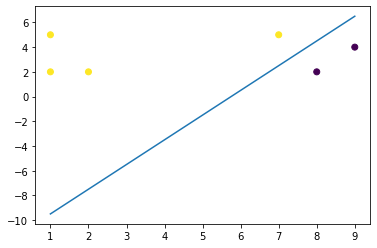

In [16]:
plt.scatter(tpts[:, 0], tpts[:, 1], c=labels)
plt.plot(x, y, '-')